In [1]:
import numpy as np
from scipy import integrate
from astropy import constants as const
from astropy import units as u
import plotter as p #plotter function
import gravSolve as gs #gravity solver function
import matplotlib.pyplot as plt

In [2]:
#units used: AU, Msun, yr
G = const.G.to('AU**3/Msun*yr**2').value

M1 = 0.8
M2 = (233.3076*u.Mearth).to('Msun').value
M3 = M1
e = 0.0000
a = 0.110

# compute some other useful quantities
Mtot=M1+M2
mu=M1*M2/Mtot
ell=np.sqrt(G*Mtot*a*(1.0-e**2))
P=2.0*np.pi*np.sqrt(a**3/(G*Mtot))
# set initial conditions correpsonding to apoapsis
rap=a*(1.0+e)
vap=ell/rap


# positions and velocities of the two stars
a1=rap*mu/M1
a2=rap*mu/M2
v1=vap*mu/M1
v2=vap*mu/M2

The bodies will all be constant mass and the initial conditions will stay the same for star 1 and the planet. We will change the initial position of the second star to see if the orbit becomes unstable.

The body 3 function assumes that the second star has 0 initial velocity

In [3]:
def body3(pos, p=1, ϵ=0.0001): 
    body1Pos = [a1,0,0] #(x,y,z)
    body1Velo = [0,v1,0] #(vx,vy,vz)

    body2Pos = [-a2,0,0] #(x,y,z)
    body2Velo = [0,-v2,0] #(vx,vy,vz)

    body3Pos = [pos,0,0]
    body3Velo = [0,0,0]

    mass = np.array([M1,M2, M3])
    pos = np.array([body1Pos, body2Pos, body3Pos]).flatten()
    velo = np.array([body1Velo, body2Velo, body3Velo]).flatten()
    v0 = np.array([pos, velo]).flatten()
    tarr=np.linspace(0.0, P*p, 4e3) 
    result=integrate.odeint(gs.df_Nbody,v0,tarr,args=(mass,G, ϵ)) 
    return result, tarr

The body3_kep uses Kepler's laws to find an initial velocity of the second star. It assumes a central mass that is the sum of star 1 and the planet

In [4]:
def body3_kep(pos, p=1, ϵ=0.0001): 
    Mcenter = M1 + M2 #central mass is star + planet 
    newMtot = Mcenter + M3
    Planet_mu = Mcenter * M3 / newMtot
    Planet_ell = np.sqrt(G * newMtot * a * (1.0 - e**2))
    Planet_P = 2.0 * np.pi * np.sqrt(a**3 / (G * newMtot))

    Planet_vap = Planet_ell / rap

    a3 = rap * Planet_mu / M3
    v3 = Planet_vap * Planet_mu / M3
    body1Pos = [a1,0,0] #(x,y,z)
    body1Velo = [0,v1,0] #(vx,vy,vz)

    body2Pos = [-a2,0,0] #(x,y,z)
    body2Velo = [0,-v2,0] #(vx,vy,vz)

    body3Pos = [pos,0,0]
    body3Velo = [0,v3,0]

    mass = np.array([M1,M2, M3])
    pos = np.array([body1Pos, body2Pos, body3Pos]).flatten()
    velo = np.array([body1Velo, body2Velo, body3Velo]).flatten()
    v0 = np.array([pos, velo]).flatten()
    tarr=np.linspace(0.0, P*p, 4e3) 
    result=integrate.odeint(gs.df_Nbody,v0,tarr,args=(mass,G, ϵ)) 
    return result, tarr

pos_body_3() returns the initial position of body 3. It assumes a central mass that is the sum of star 1 and the planet

In [5]:
def pos_body_3():
    Mcenter = M1 + M2 #central mass is star + planet 
    newMtot = Mcenter + M3
    Planet_mu = Mcenter * M3 / newMtot
    Planet_ell = np.sqrt(G * newMtot * a * (1.0 - e**2))
    Planet_P = 2.0 * np.pi * np.sqrt(a**3 / (G * newMtot))
    Planet_vap = Planet_ell / rap
    a3 = rap * Planet_mu / M3
    return a3

To see the orbit of star 1 and the planet, star 3 will be very far away so that it does not influence the orbits of star 1 and the planet.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


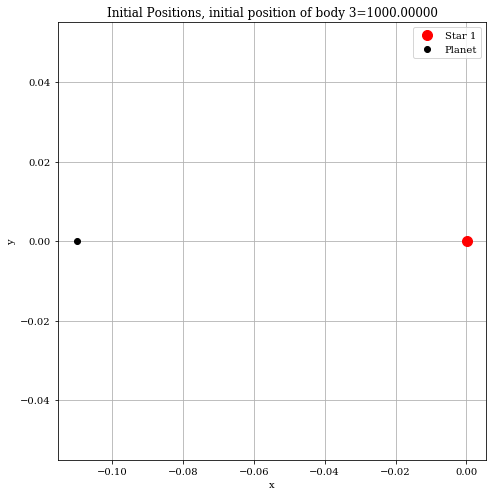

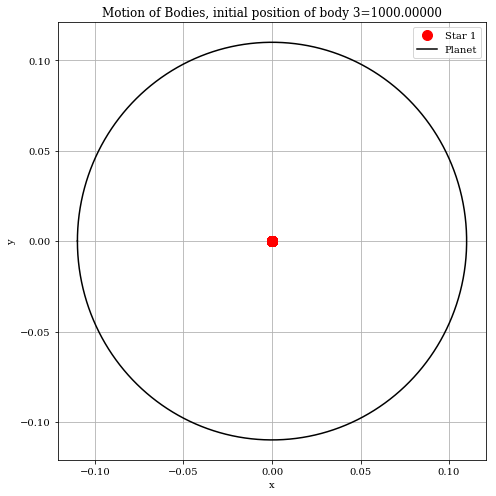

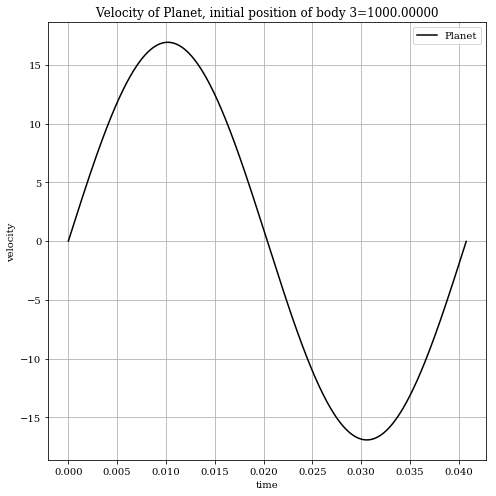

In [6]:
pos3 = 1000
result, tarr = body3(pos3, p=1, ϵ=0.001)
p.plotter(result, 1,1,0, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,0, pos3, proj=2, tarr=tarr, point='y')
p.plotter(result, 1,1,0, pos3, proj=4, tarr=tarr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


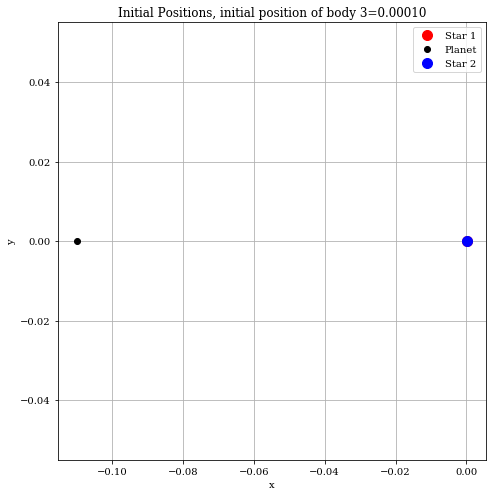

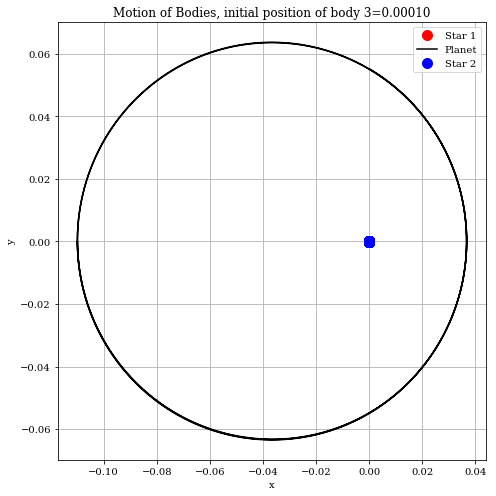

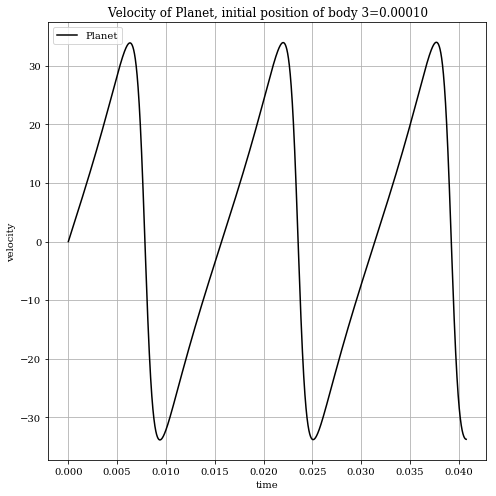

In [7]:
pos3 = a1
result, tarr = body3(pos3, p=1, ϵ=0.001)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr, point='y')
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

The companion star is actually about 3 AU from star 1. Without using Kepler's laws to find the second star's initial velocity, the orbit of the planet becomes unstable when the position of the second star is 8.99 AU away

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


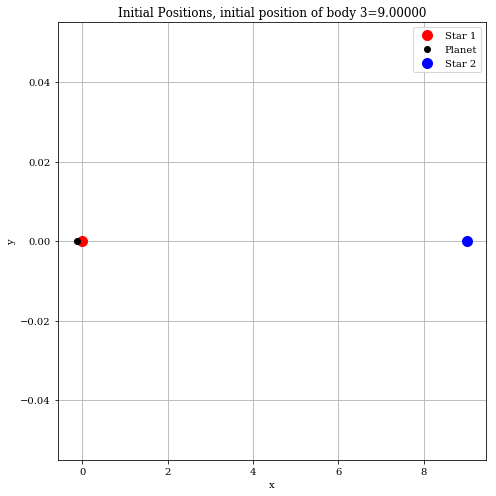

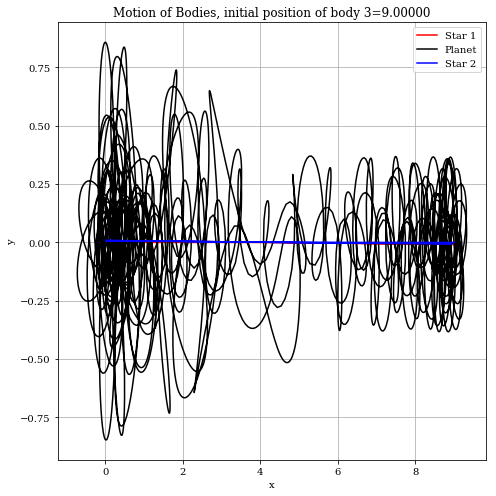

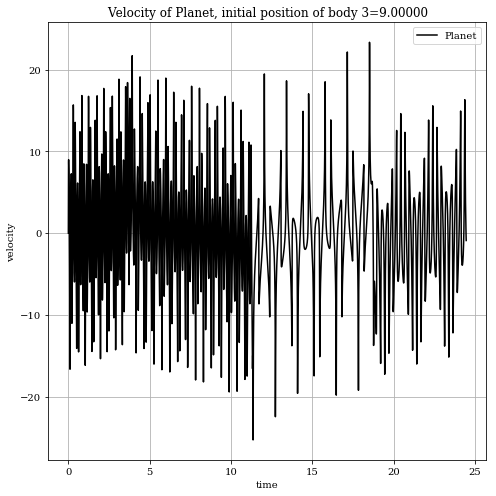

In [8]:
pos3 = 9
result, tarr = body3(pos3, p=600, ϵ=0.09)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

When star 2 is 8.99 AU away from star 1, it takes 93 periods for the orbit of the planet to be unstable

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


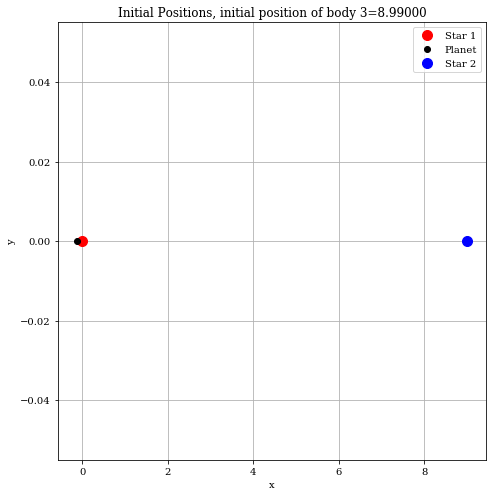

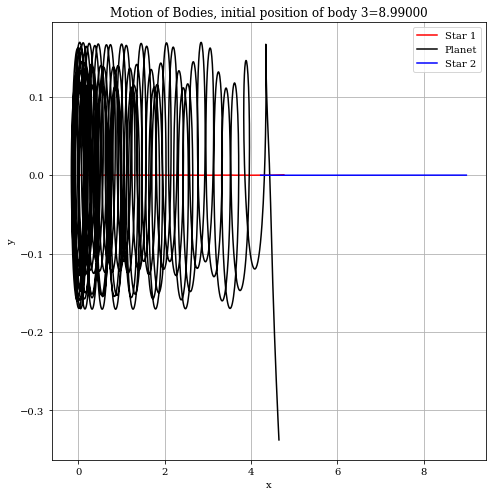

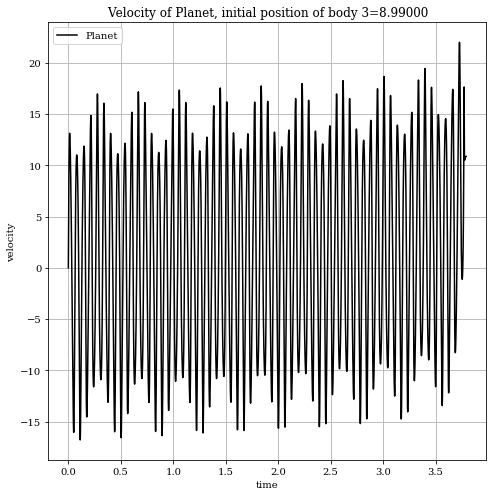

In [9]:
pos3 = 8.99
result, tarr = body3(pos3, p=93, ϵ=0.05)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

When star 2 is 0.5 AU away from star 1, it takes 42 periods for the orbit of the planet to be unstable

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


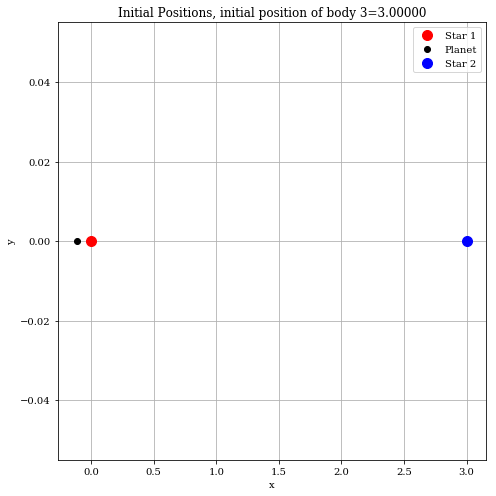

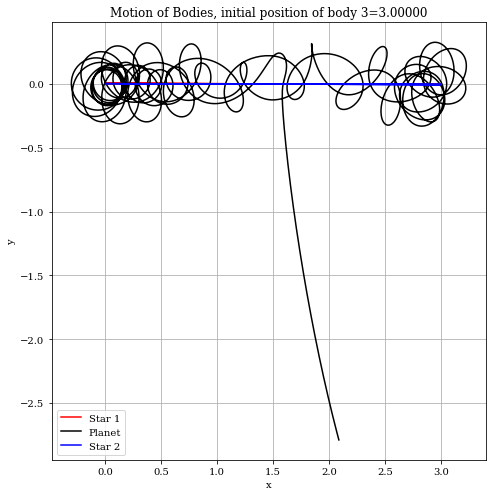

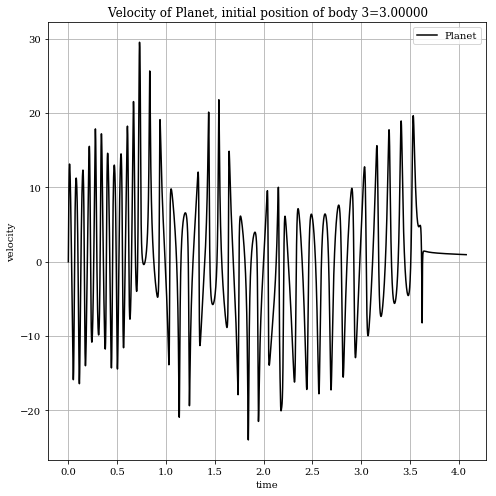

In [20]:
pos3 = 3
result, tarr = body3(pos3, p=100, ϵ=0.05)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

When star 2 is 0.4 AU away from star 1, the orbit of the 3body system is still stable. The next few plots are using Kepler's laws to find the initial velocity of star 2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


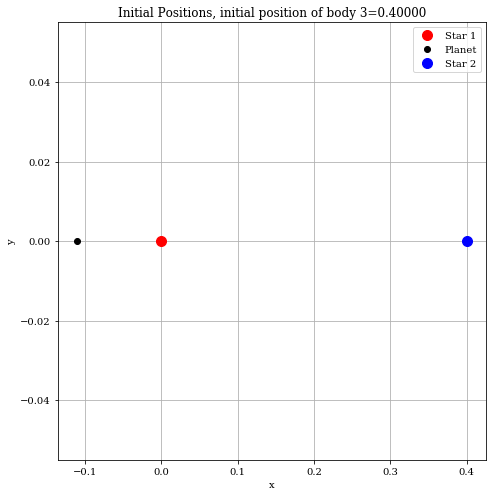

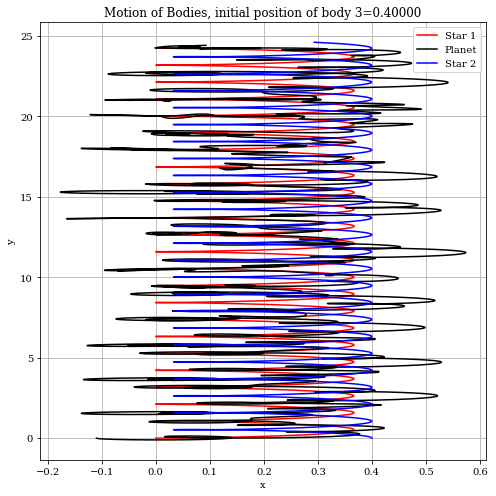

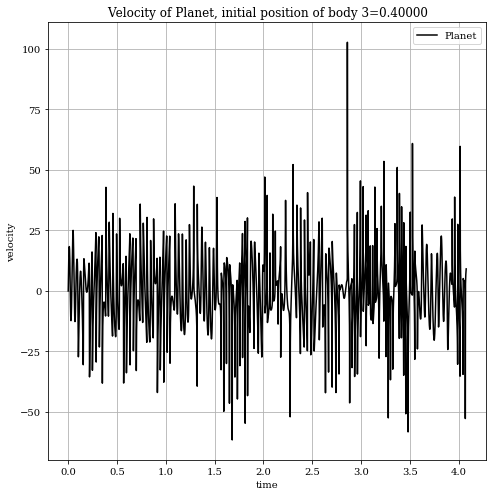

In [11]:
pos3 = 0.4
result, tarr = body3_kep(pos3, p=100, ϵ=0.001)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

The orbit becomes unstable when the second star is about 0.389 AU from star 1. The orbit becomes unstable at around 80 periods

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


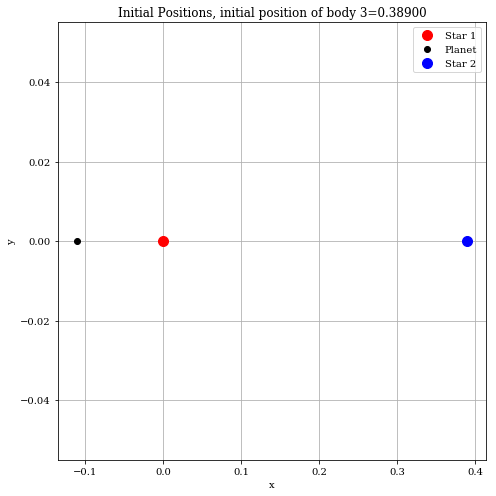

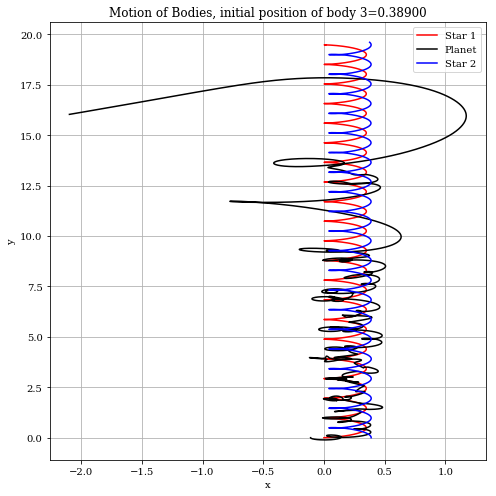

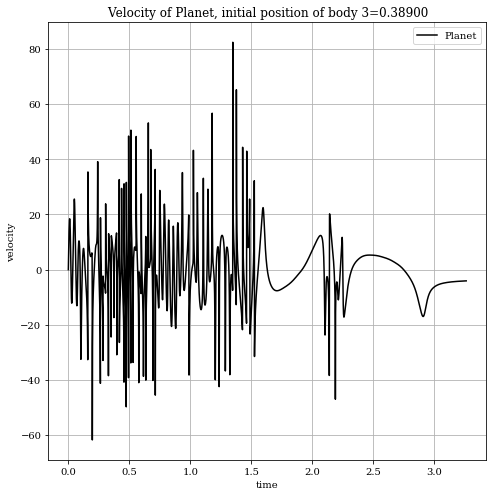

In [12]:
pos3 = 0.389
result, tarr = body3_kep(pos3, p=80, ϵ=0.001)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

Star 2 is "inside" the orbit of the star 1 - planet system. This does not show an S type orbit. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


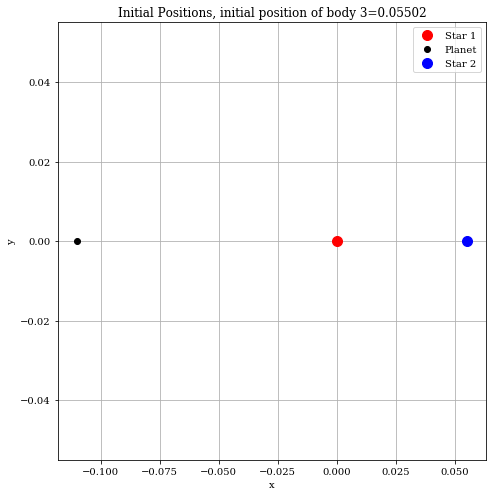

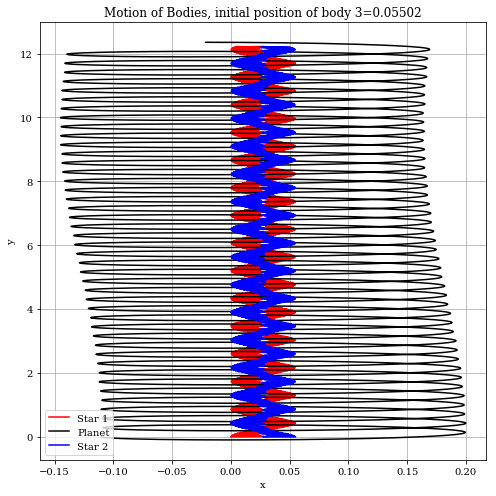

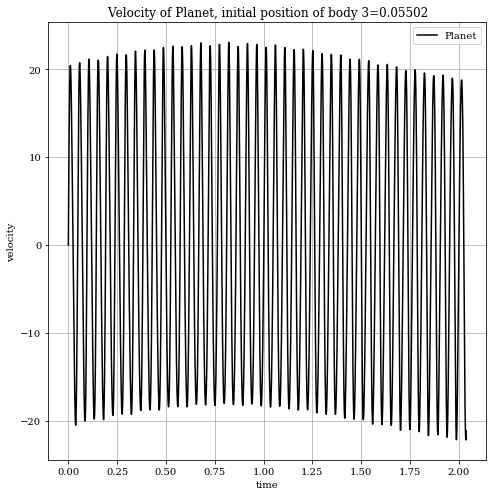

In [13]:
pos3 = pos_body_3() #position determined from Kepler's laws
result, tarr = body3_kep(pos3, p=50, ϵ=0.001)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)

The companion star is about 3 AU from star 1. The orbit of the planet is stable

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


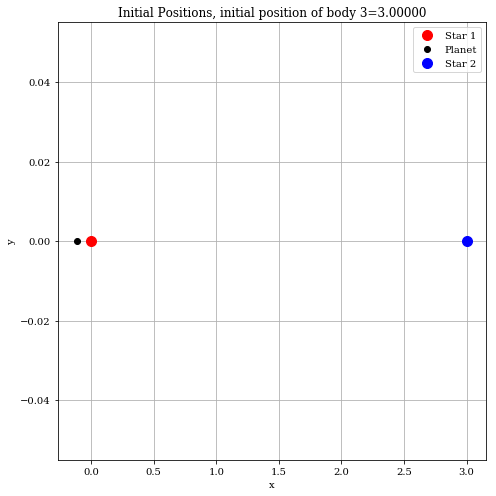

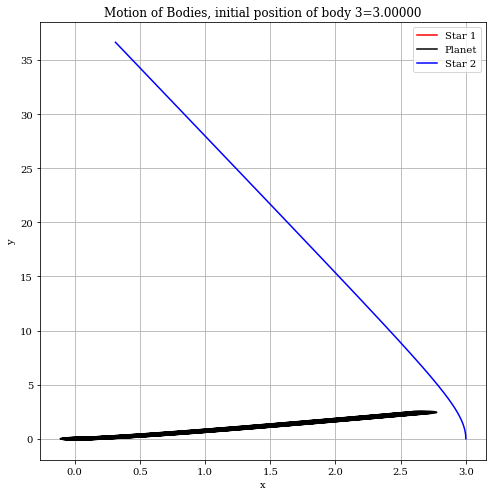

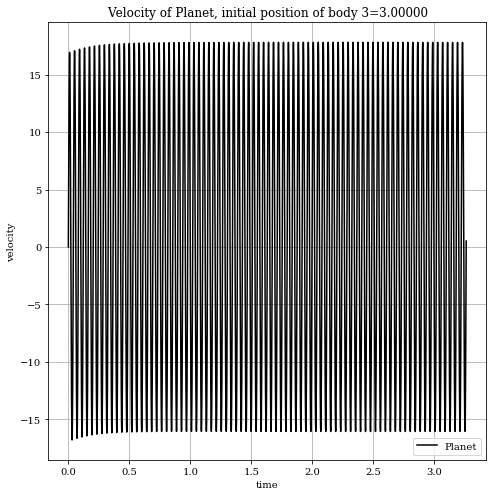

In [14]:
pos3 = 3
result, tarr = body3_kep(pos3, p=80, ϵ=0.001)
p.plotter(result, 1,1,1, pos3, proj=0, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=2, tarr=tarr)
p.plotter(result, 1,1,1, pos3, proj=4, tarr=tarr)